## Part 1

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
cap = cv2.VideoCapture(0)

In [4]:
!pip install opencv-contrib-python --user

while True:
    ret, frame = cap.read()
    cv2.imshow('ABESIT', frame)
    k = cv2.waitKey(1)
    if k == 13:
        break

cap.release()
cv2.destroyAllWindows()

## Part 2

In [5]:
# Part 2

'''imutils is a series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, 
etc.'''
# !pip install imutils
!pip install dlib


from imutils import face_utils

import dlib
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture(0)
 
while True:
    _, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 0)
    
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    cv2.imshow("Output", image)
    k = cv2.waitKey(1) & 0xFF
    if k == 13:
        break

cv2.destroyAllWindows()
cap.release()

In [6]:
# Part 2

'''imutils is a series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, 
etc.'''
# !pip install imutils
!pip install opencv-contrib-python
from imutils import face_utils

import dlib
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
 
image = cv2.imread('bb.jpg')

while True:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 0)
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    cv2.imwrite("bb_new.jpg", image)
    break

cv2.destroyAllWindows()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
a = [1,2,3,4]
b = a.copy() # deep copies
# b = a  # shallow copies

a[0] = 10

print(a)
print(b)

In [ ]:
# part 3
import cv2
import numpy as np
import dlib

cap = cv2.VideoCapture(0)
_, frame = cap.read()
rows, cols, _ = frame.shape

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    cv2.imshow("Original Frame", frame)
    copy = frame.copy()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(frame)
    for face in faces:
        landmarks = predictor(gray_frame, face)
        top_nose = (landmarks.part(29).x, landmarks.part(29).y)
        center_nose = (landmarks.part(30).x, landmarks.part(30).y)
        left_nose = (landmarks.part(31).x, landmarks.part(31).y)
        right_nose = (landmarks.part(35).x, landmarks.part(35).y)
        cv2.circle(copy, (int(top_nose[0]), int(top_nose[1])), 2, (0, 255, 0), -1)
        cv2.circle(copy, (int(center_nose[0]), int(center_nose[1])), 2, (0, 255, 0), -1)
        cv2.circle(copy, (int(left_nose[0]), int(left_nose[1])), 2, (0, 255, 0), -1)
        cv2.circle(copy, (int(right_nose[0]), int(right_nose[1])), 2, (0, 255, 0), -1)
        cv2.imshow("Frame with nose-facial marks", copy)
    key = cv2.waitKey(1)
    if key == 13:
        break

cap.release()
cv2.destroyAllWindows()

## Part 4

In [7]:
from math import hypot

hypot(3, 4)

5.0

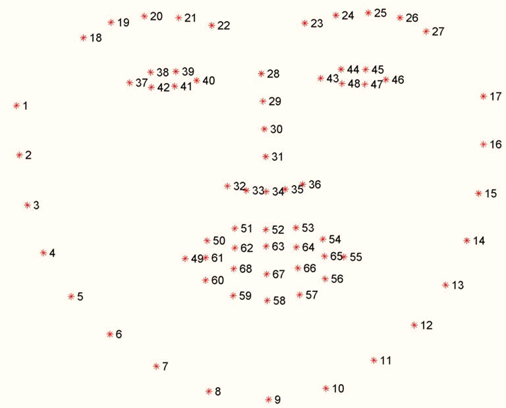

In [ ]:
import cv2
import numpy as np
import dlib
from math import hypot

cap = cv2.VideoCapture(0)
nose_image = cv2.imread("pig_nose.png")
_, frame = cap.read()
rows, cols, _ = frame.shape
nose_mask = np.zeros((rows, cols), np.uint8)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    cv2.imshow("Original Frame", frame)
    nose_mask.fill(0)
    copy = frame.copy()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(frame)
    for face in faces:
        landmarks = predictor(gray_frame, face)
        top_nose = (landmarks.part(29).x, landmarks.part(29).y)
        center_nose = (landmarks.part(30).x, landmarks.part(30).y)
        left_nose = (landmarks.part(31).x, landmarks.part(31).y)
        right_nose = (landmarks.part(35).x, landmarks.part(35).y)
        cv2.circle(copy, (int(top_nose[0]), int(top_nose[1])), 2, (0, 255, 0), 2)
        cv2.circle(copy, (int(center_nose[0]), int(center_nose[1])), 2, (0, 0, 255), 2)
        cv2.circle(copy, (int(left_nose[0]), int(left_nose[1])), 2, (0, 255, 255), 2)
        cv2.circle(copy, (int(right_nose[0]), int(right_nose[1])), 2, (255, 0, 0), 2)
        cv2.imshow("Frame with nose-facial marks", copy)

        nose_width = int(hypot(left_nose[0] - right_nose[0], left_nose[1] - right_nose[1]) * 1.7)
        nose_height = int(nose_width * 0.67)

        top_left = (int(center_nose[0] - nose_width / 2), int(center_nose[1] - nose_height / 2))
        bottom_right = (int(center_nose[0] + nose_width / 2), int(center_nose[1] + nose_height / 2))

        nose_pig = cv2.resize(nose_image, (nose_width, nose_height))
        nose_pig_gray = cv2.cvtColor(nose_pig, cv2.COLOR_BGR2GRAY)

        _, nose_mask = cv2.threshold(nose_pig_gray, 25, 255, cv2.THRESH_BINARY_INV)
        
        nose_area = frame[top_left[1]: top_left[1] + nose_height, top_left[0]: top_left[0] + nose_width]
        nose_area_no_nose = cv2.bitwise_and(nose_area, nose_area, mask = nose_mask)
        final_nose = cv2.add(nose_area_no_nose, nose_pig)
        frame[top_left[1]: top_left[1] + nose_height, top_left[0]: top_left[0] + nose_width] = final_nose
    cv2.imshow("Frame with nose-filter", frame)
    key = cv2.waitKey(1)
    if key == 13:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
plt.imshow(image[:, :])
plt.show()